In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("../coviddata.csv")

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
continent = pd.read_csv('../continentconvert.csv')

In [41]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441517 entries, 0 to 2441516
Data columns (total 13 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   iso_3166_2_code                                     object 
 5   census_fips_code                                    float64
 6   date                                                object 
 7   retail_and_recreation_percent_change_from_baseline  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   float64
 9   parks_percent_change_from_baseline                  float64
 10  transit_stations_percent_change_from_baseline       float64
 11  workplaces_percent_change_from_baseli

In [43]:
df['country_region_code'].value_counts()

US    556359
BR    387242
IN    139684
TR    110773
GB     87801
       ...  
MD       210
KZ       210
AW       210
TT       210
FJ       210
Name: country_region_code, Length: 134, dtype: int64

In [9]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-15,1.0,6.0,-2.0,-1.0,2.0,1.0
1,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-16,-2.0,5.0,2.0,-2.0,2.0,1.0
2,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-17,-3.0,2.0,4.0,-3.0,2.0,1.0
3,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-18,-3.0,2.0,1.0,-2.0,2.0,1.0
4,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-19,-3.0,1.0,0.0,-1.0,2.0,1.0


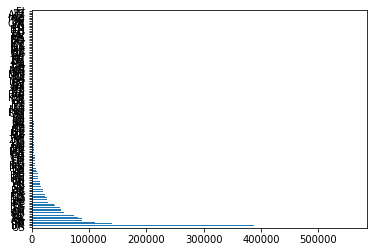

In [19]:
df['country_region_code'].value_counts().plot(kind='barh')

In [36]:
df['country_region_code'].value_counts()

US    556359
BR    387242
IN    139684
TR    110773
GB     87801
       ...  
MD       210
KZ       210
AW       210
TT       210
FJ       210
Name: country_region_code, Length: 134, dtype: int64

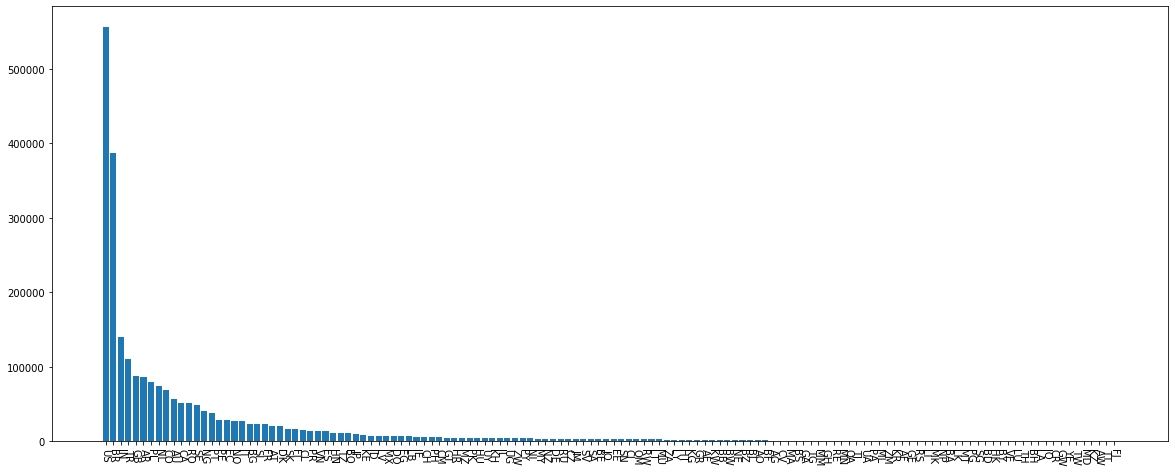

In [35]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df['country_region_code'].value_counts().keys(),df['country_region_code'].value_counts().values,label='OCD')
plt.xticks(rotation=270);

country_region_code : number of NaN:  1636
country_region : number of NaN:  0
sub_region_1 : number of NaN:  41730
sub_region_2 : number of NaN:  415686
iso_3166_2_code : number of NaN:  2013014
census_fips_code : number of NaN:  1895868
date : number of NaN:  0
retail_and_recreation_percent_change_from_baseline : number of NaN:  859392
grocery_and_pharmacy_percent_change_from_baseline : number of NaN:  890461
parks_percent_change_from_baseline : number of NaN:  1259818
transit_stations_percent_change_from_baseline : number of NaN:  1174373
workplaces_percent_change_from_baseline : number of NaN:  111410
residential_percent_change_from_baseline : number of NaN:  1162476


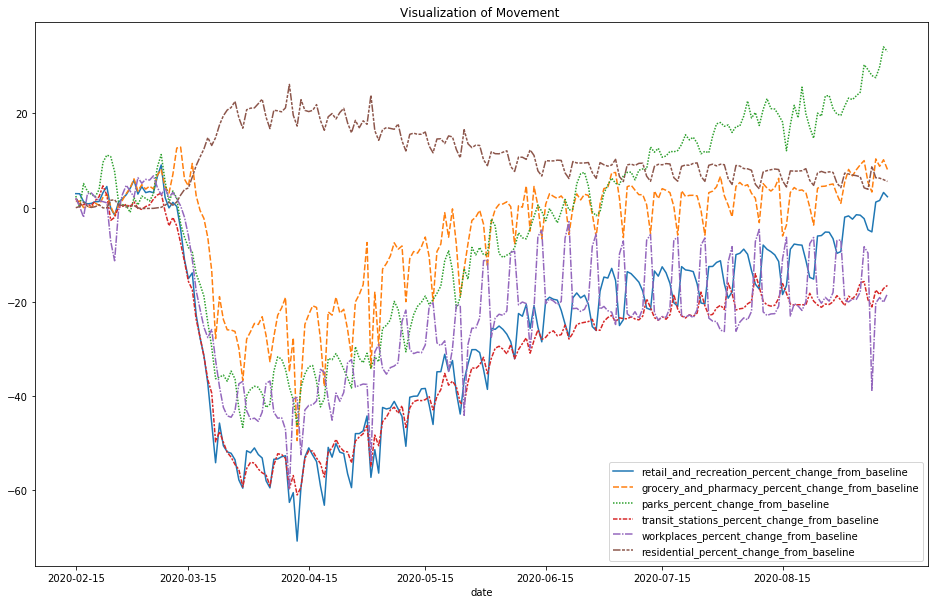

In [39]:
for column in df.columns:
  print(column, ': number of NaN: ' ,sum(df[column].isna()))
  
  col_to_use = ['date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']
    
#df_for_graph = df.loc[:,col_to_use]
df_for_graph = df.loc[:, ['date','retail_and_recreation_percent_change_from_baseline']]
df_for_graph = df_for_graph[~df_for_graph['retail_and_recreation_percent_change_from_baseline'].isna()]
df_for_graph.index = np.arange(len(df_for_graph))
df_for_graph = df_for_graph.groupby('date').mean()

col_for_graph = ['grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']
       
       
for column in col_for_graph:
  df_temp = df.loc[:, ['date', column]]
  df_temp = df_temp[~df_temp[column].isna()]
  df_temp.index = np.arange(len(df_temp))
  df_temp_group = df_temp.groupby('date').mean()
  df_for_graph[column] = df_temp_group[column]
  
  
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
ax = sns.lineplot(data=df_for_graph)
ax.set(title = 'Visualization of Movement ')
ax.set_xticks(['2020-02-15', '2020-03-15', '2020-04-15', '2020-05-15', '2020-06-15', '2020-07-15', '2020-08-15'])
plt.savefig('blabla.jpg', bbox_inches='tight', dpi=500) 
plt.show()